# Cheatsheet (progmatisch)
>## <ins>Table of contents</ins> <a name="up"></a>[<sup>[1]</sup>](#cite_note-1)
>* [**1. Allgemein**](#1.)
>* [**K2. Überwachtes Lernen**](#K2)
    * [**2.1. Lineare Regression**](#2.1.)
       * [**2D**](#2_1_2D)
       * [**3D**](#2_1_3D)
    * [**2.2. logistische Regression**](#2.2.)
       * [**2D**](#2_1_2D)
       * [**3D**](#2_1_3D)
    * [**2.3. SVM**](#2.3.)
    * [**2.4. Lineare Regression**](#2.4.)
>* [**K3. Motivation und Grundlagen**](#K3)
>* [**K4. Motivation und Grundlagen**](#K4)
>* [**K5. Motivation und Grundlagen**](#K5)
    * [**5.1. RNN**](#5.1.)
       * [**5.1. RNN**](#5.1.)
    * [**5.3. RNN**](#5.3.)
       * [**spaltenweise Konkatenation zweier Matrizen**](#5.3.1.)
       * [**One-Hot-Codierung**](#5.3.2.)
       * [**Berechnungsgraphen**](#5.3.3.)

>


In [75]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt


## 1. Allgemein <a name=1.><a>

### data preparation

In [7]:
# Ihre Daten
data = {
    'height': [153.3, 158.9, 160.8, 179.6, 156.6, 165.1, 165.9, 156.7, 167.8, 160.8],
    'ringlength': [47.1, 46.8, 49.3, 53.2, 47.7, 49.0, 50.6, 47.1, 51.7, 47.8]
}
D = [
    ((153.3), 47.1),
    ((158.9), 46.8),
    ((160.8), 49.3),
    ((179.6), 53.2),
    ((156.6), 47.7),
    ((165.1), 49.0),
    ((165.9), 50.6),
    ((156.7), 47.1),
    ((167.8), 51.7),
    ((160.8), 47.8)
]

# Umwandlung in DataFrame
df = pd.DataFrame(D, columns=['x', 'y'])

# Umwandlung in Numpy Arrays
x = np.array(df['x'])#.reshape(-1, 1)
y = np.array(df['y'])#.reshape(-1, 1)

### data visualisieren

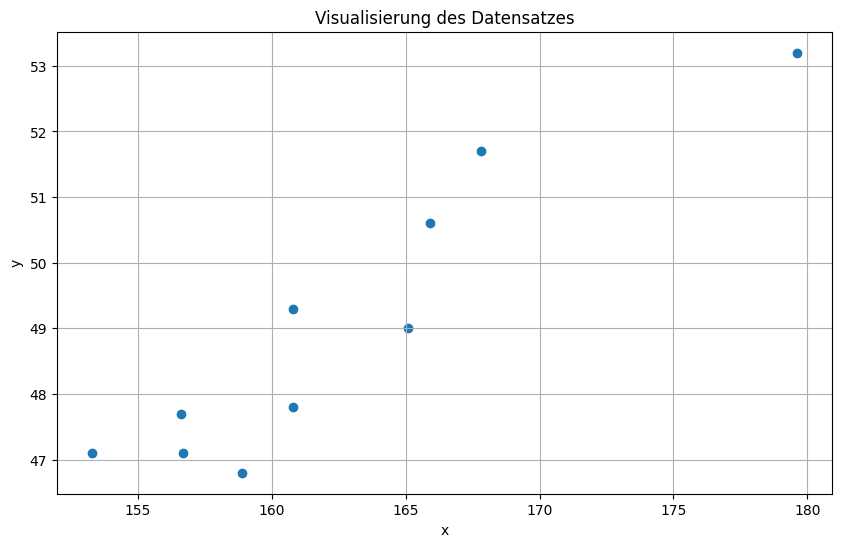

In [23]:
# Datensatz visualisieren
def visualise_datensatz(x,y):
    # Erstellen Sie das Diagramm
    plt.figure(figsize=(10, 6))
    plt.scatter(x,y)
    plt.title('Visualisierung des Datensatzes')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    
visualise_datensatz(X,y)

## 2 Überwachtes Lernen <a name=2><a>

---
| Type of classification | python method | imports |
| -------- | -------- | -------- |
| **lineare Regression** | clf = LinearRegression().fit(X, Y) | from sklearn.linear_model import LinearRegression |
| **logistische Regression**|
| 1 class | clf = LogisticRegression().fit(X, Y) | from sklearn.linear_model import LogisticRegression |
| Multi-class | clf = LogisticRegression(multi_class='ovr') | from sklearn.linear_model import LogisticRegression |
| **Support Vector Machine**|
| linear SVM        | clf =  SVC(kernel='linear').fit(X, y) | from sklearn.svm import SVC |
| non-linear SVM | clf = SVC(kernel='linear',C=1).fit(X, y) | from sklearn.svm import SVC |
| Kernel SVM | clf = SVC(kernel='rbf',C=1,gamma=1).fit(X, y) | from sklearn.svm import SVC|
| **KNN**|
| KNN-Algorithmus | clf = KNeighborsClassifier(n_neighbors=1).fit(X,y) | from sklearn.neighbors import KNeighborsClassifier |
| Nächste-Nachbarn-Regression | clf = KNeighborsRegressor(n_neighbors=1).fit(X,y) | from sklearn.neighbors import KNeighborsRegressor |
| **Bayes Klassifikation**|
| *Naive Bayes* | clf = GaussianNB().fit(X, y) | from sklearn.naive_bayes import GaussianNB |
| **Entscheidungsbäume**|
| *decision tree* | tree = tree.DecisionTreeClassifier().fit(X, y) | from sklearn import tree |
| *encode describtive values to ordinal* | X_enc = preprocessing.OrdinalEncoder().fit_transform(X) | from sklearn import preprocessing  |


### 2.1. Lineare Regression <a name=2.1.><a>

#### 1. 2D modell <a name=2_1_2D><a>

##### Das optimale linearer Modell berechnen

In [86]:
D = [
    ((153.3), 47.1),
    ((158.9), 46.8),
    ((160.8), 49.3),
    ((179.6), 53.2),
    ((156.6), 47.7),
    ((165.1), 49.0),
    ((165.9), 50.6),
    ((156.7), 47.1),
    ((167.8), 51.7),
    ((160.8), 47.8)
]

# Umwandlung in DataFrame
df = pd.DataFrame(D, columns=['x', 'y'])

# Umwandlung in Numpy Arrays
X = np.array(df['x']).reshape(-1, 1)
y = np.array(df['y']).reshape(-1, 1)

In [19]:
regr = LinearRegression().fit(X,y)
ypts_pred = regr.predict(y)
#y_pred = regr.predict(X)

theta_0 = regr.intercept_[0] #konstante θ0 
theta_koef = regr.coef_[0][0] #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das optimale trainierte Modell ist: h(x) = {theta_0} + {theta_koef}x ")

Das optimale trainierte Modell ist: h(x) = 5.3623451652386365 + 0.2686413708690333x 


##### Evaluation: Datensatz teilen

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regr.fit(X_train,y_train)

LinearRegression()

##### Bestimmtheitsmaß $R^2$-Wert

$R^2(D_{ring} , f)$, $R^2(D^{train}_{ring} , f)$, $R^2(D^{test}_{ring} , f)$

In [74]:

print(f'R²(D): {round(regr.score(X,y),3)}')
print(f'R²(Dtrain): {round(regr.score(X_train, y_train),3)}')
print(f'R²(Dtest): {round(regr.score(X_test, y_test),3)}')


R²(D): 0.767
R²(Dtrain): 0.998
R²(Dtest): 0.082


##### Ridge-Regression


In [83]:
D = [
    ((153.3), 47.1),
    ((158.9), 46.8),
    ((160.8), 49.3),
    ((179.6), 53.2),
    ((156.6), 47.7),
    ((165.1), 49.0),
    ((165.9), 50.6),
    ((156.7), 47.1),
    ((167.8), 51.7),
    ((160.8), 47.8)
]

# Trennen Sie die Merkmale und die Zielwerte
features = np.array([x for (x, y) in D]).reshape(-1, 1)
targets = np.array([y for (x, y) in D])

ridge_regr = Ridge(alpha=0.1).fit(features,targets)
ridge_regr.score(features,targets)

theta_0 = ridge_regr.intercept_ #konstante θ0 
theta_koef = ridge_regr.coef_ #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das optimale Ridge-Regressions Modell ist: h(x) = {round(theta_0,3)} + \n{theta_koef} x\n")
print(f'R²(D): {round(ridge_regr.score(features,targets),3)}')


Das optimale Ridge-Regressions Modell ist: h(x) = 5.371 + 
[0.26858877] x

R²(D): 0.862


##### Polynomische Merkmale + Ridge-Regression


In [70]:
import math

D = [
    ((153.3), 47.1),
    ((158.9), 46.8),
    ((160.8), 49.3),
    ((179.6), 53.2),
    ((156.6), 47.7),
    ((165.1), 49.0),
    ((165.9), 50.6),
    ((156.7), 47.1),
    ((167.8), 51.7),
    ((160.8), 47.8)
]

# Trennen Sie die Merkmale und die Zielwerte
features = np.array([x for (x, y) in D]).reshape(-1, 1)
targets = np.array([y for (x, y) in D])

# Erstellen Sie das PolynomialFeatures-Objekt mit Grad 2
poly = PolynomialFeatures(2)

# Wenden Sie die Transformation auf Ihre Daten an
features_poly = poly.fit_transform(features)

# Jetzt enthält 'features_poly' die polynomiale Merkmalserweiterung von 'features'
print(features_poly)

# Anwendung der math.floor oder math.ceil Funktion auf jede Zahl in jeder Liste
correctly_rounded_data = [[math.floor(number + 0.5) if number >= 0 else math.ceil(number - 0.5) for number in sublist] for sublist in features_poly]

# Ausgabe der korrekt gerundeten Daten
for sublist in correctly_rounded_data:
    print(sublist)

poly_regr = LinearRegression().fit(features_poly,targets)
y_pred = poly_regr.predict(features_poly)

theta_0 = poly_regr.intercept_ #konstante θ0 
theta_koef = poly_regr.coef_ #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das polynomialerweiterte Modell ist: h(x) = {round(theta_0,3)} + \n{theta_koef} x\n")

ridge_regr = Ridge(alpha=0.1).fit(features_poly,targets)
ridge_regr.score(features_poly,targets)

theta_0 = ridge_regr.intercept_ #konstante θ0 
theta_koef = ridge_regr.coef_ #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das optimale Ridge-Regressions Modell ist: h(x) = {round(theta_0,3)} + \n{theta_koef} x\n")

[[1.000000e+00 1.533000e+02 2.350089e+04]
 [1.000000e+00 1.589000e+02 2.524921e+04]
 [1.000000e+00 1.608000e+02 2.585664e+04]
 [1.000000e+00 1.796000e+02 3.225616e+04]
 [1.000000e+00 1.566000e+02 2.452356e+04]
 [1.000000e+00 1.651000e+02 2.725801e+04]
 [1.000000e+00 1.659000e+02 2.752281e+04]
 [1.000000e+00 1.567000e+02 2.455489e+04]
 [1.000000e+00 1.678000e+02 2.815684e+04]
 [1.000000e+00 1.608000e+02 2.585664e+04]]
[1, 153, 23501]
[1, 159, 25249]
[1, 161, 25857]
[1, 180, 32256]
[1, 157, 24524]
[1, 165, 27258]
[1, 166, 27523]
[1, 157, 24555]
[1, 168, 28157]
[1, 161, 25857]
Das optimale trainierte Modell ist: h(x) = -32.058 + 
[ 0.          0.7195757  -0.00135527] x


##### 6. Kreuzvalidierung (engl. cross validation)

In [87]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X, y, cv=3)
scores

array([0.75468997, 0.74975476, 0.77382931])

In [12]:
scores.mean()

0.7594246779223471

#### 2. 3D modell <a name=2_1_3D><a>

##### optimale trainierte Modell 

In [84]:
# Ihr Datensatz
D = [((23,36),0.1),((23,34),0),((26,29),1.2),((21,40),-0.5),((20,33),-1.5),((25,35),0.7)]

# Umwandlung in DataFrame
df = pd.DataFrame(D, columns=['x', 'y'])
df[['x1', 'x2']] = pd.DataFrame(df['x'].tolist(), index=df.index)
df = df.drop('x', axis=1)

X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()#
X

array([[23, 36],
       [23, 34],
       [26, 29],
       [21, 40],
       [20, 33],
       [25, 35]], dtype=int64)

In [64]:
regr = LinearRegression().fit(X,y)
y_pred = regr.predict(X)

theta_0 = regr.intercept_ #konstante θ0 
theta_koef = regr.coef_ #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das optimale trainierte Modell ist: h(x) = {round(theta_0,3)} + {round(theta_koef[0],3)}x1 + {round(theta_koef[1],3)}x2 ")

Das optimale trainierte Modell ist: h(x) = -11.918 + 0.445x1 + 0.049x2 


##### Evaluation: Datensatz teilen

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regr.fit(X_train,y_train)

LinearRegression()

##### Bestimmtheitsmaß $R^2$-Wert

$R^2(D_{ring} , f)$, $R^2(D^{train}_{ring} , f)$, $R^2(D^{test}_{ring} , f)$

In [74]:

print(f'R²(D): {round(regr.score(X,y),3)}')
print(f'R²(Dtrain): {round(regr.score(X_train, y_train),3)}')
print(f'R²(Dtest): {round(regr.score(X_test, y_test),3)}')


R²(D): 0.767
R²(Dtrain): 0.998
R²(Dtest): 0.082


##### Ridge-Regression


In [81]:
D=[((12,7),5.5),((10,8),6),((10,7.5),7),((15,5),6.5),((16,9),7.5),((18,8),10)]

# Trennen Sie die Merkmale und die Zielwerte
features = np.array([x for (x, y) in D])
targets = np.array([y for (x, y) in D])

ridge_regr = Ridge(alpha=0.1).fit(features,targets)
ridge_regr.score(features,targets)

theta_0 = ridge_regr.intercept_ #konstante θ0 
theta_koef = ridge_regr.coef_ #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das optimale Ridge-Regressions Modell ist: h(x) = {round(theta_0,3)} + \n{theta_koef} x\n")

Das optimale Ridge-Regressions Modell ist: h(x) = -0.278 + 
[0.34710592 0.36072884] x



##### Polynomische Merkmale + Ridge-Regression


In [80]:
import math

D=[((12,7),5.5),((10,8),6),((10,7.5),7),((15,5),6.5),((16,9),7.5),((18,8),10)]

# Trennen Sie die Merkmale und die Zielwerte
features = np.array([x for (x, y) in D])
targets = np.array([y for (x, y) in D])

# Erstellen Sie das PolynomialFeatures-Objekt mit Grad 2
poly = PolynomialFeatures(2)

# Wenden Sie die Transformation auf Ihre Daten an
features_poly = poly.fit_transform(features)

# Jetzt enthält 'features_poly' die polynomiale Merkmalserweiterung von 'features'
print(features_poly)

# Anwendung der math.floor oder math.ceil Funktion auf jede Zahl in jeder Liste
correctly_rounded_data = [[math.floor(number + 0.5) if number >= 0 else math.ceil(number - 0.5) for number in sublist] for sublist in features_poly]

# Ausgabe der korrekt gerundeten Daten
for sublist in correctly_rounded_data:
    print(sublist)

poly_regr = LinearRegression().fit(features_poly,targets)
y_pred = poly_regr.predict(features_poly)

theta_0 = poly_regr.intercept_ #konstante θ0 
theta_koef = poly_regr.coef_ #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das polynomialerweiterte Modell ist: h(x) = {round(theta_0,3)} + \n{theta_koef} x\n")

ridge_regr = Ridge(alpha=0.1).fit(features_poly,targets)
ridge_regr.score(features_poly,targets)

theta_0 = ridge_regr.intercept_ #konstante θ0 
theta_koef = ridge_regr.coef_ #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das optimale Ridge-Regressions Modell ist: h(x) = {round(theta_0,3)} + \n{theta_koef} x\n")

[[  1.    12.     7.   144.    84.    49.  ]
 [  1.    10.     8.   100.    80.    64.  ]
 [  1.    10.     7.5  100.    75.    56.25]
 [  1.    15.     5.   225.    75.    25.  ]
 [  1.    16.     9.   256.   144.    81.  ]
 [  1.    18.     8.   324.   144.    64.  ]]
[1, 12, 7, 144, 84, 49]
[1, 10, 8, 100, 80, 64]
[1, 10, 8, 100, 75, 56]
[1, 15, 5, 225, 75, 25]
[1, 16, 9, 256, 144, 81]
[1, 18, 8, 324, 144, 64]
Das polynomialerweiterte Modell ist: h(x) = 113.556 + 
[  0.          -9.56666667 -11.43333333   0.22777778   0.46111111
   0.31111111] x

Das optimale Ridge-Regressions Modell ist: h(x) = 16.685 + 
[ 0.         -2.36485976  0.72373789  0.10866119 -0.03182999 -0.01165762] x



##### 6. Kreuzvalidierung (engl. cross validation)

In [85]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X, y, cv=3)
scores

array([0.384964  , 0.67602274, 0.92823118])

In [12]:
scores.mean()

0.7594246779223471

### 2.2. logistische Regression <a name=2.2.><a>

#### 1. 2D modell <a name=2_2_2D><a>

#### 2. 3D modell <a name=2_2_3D><a>

---
## 5.3. RNN <a name=5.1.><a>

### 5.3.1. spaltenweise Konkatenation zweier Matrizen <a name=5.3.1.><a>

Sei $A \in \mathbb{R}^{n \times m}$ und $B \in \mathbb{R}^{n \times m'}$ zwei Matrizen mit gleicher Anzahl an Zeilen, so ist $A \circ B \in \mathbb{R}^{n \times (m + m')}$ die entsprechende Konkatenation:

In [ ]:
# Erstellen Sie die Matrizen A und B mit Dummy-Zahlen
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

B = np.array([[10, 11, 12], 
              [13, 14, 15], 
              [16, 17, 18]])

# Führen Sie die Konkatenation durch
AB = np.concatenate((A, B), axis=1)
print(AB)

# Erstellen Sie die Vektoren v und w mit Dummy-Zahlen
v = np.array([1, 2, 3])  # v = (v1, ..., vm)^T
w = np.array([4, 5, 6])  # w = (w1, ..., wm')^T

# Führen Sie die Konkatenation durch
vw = np.concatenate((v, w))
print("v ◦ w =", vw)

Vergewissern Sie sich, dass für die obigen Definition gilt $(A \circ B)(v \circ w) = Av + Bw$.

In [ ]:
result1 = np.dot(AB,vw)
result2 = np.dot(A,v) + np.dot(B,w)
print(result1 == result2)

### 5.3.2. One-Hot-Codierung <a name=5.3.2.><a>


Sei ein Alphabet gegeben durch

Σ={a,e,s,t}

1. Bestimmen Sie eine One-Hot-Codierung für Σ
. (Anwortformat '(1,2,3,4,5,6)', Vektorlänge ist selbst zu wä
2. Wie ist demnach das Wort test
 codiert 

(Anwortformat '((1,2,3,4,5,6),(7,8,9))')
#### Lösung
- a: (1, 0, 0, 0)
- e: (0, 1, 0, 0)
- s: (0, 0, 1, 0)
- t: (0, 0, 0, 1)

Unter Verwendung der zuvor definierten One-Hot-Codierung für das Alphabet Σ={a,e,s,t}, wird das Wort "test" wie folgt codiert:

- t: (0, 0, 0, 1)
- e: (0, 1, 0, 0)
- s: (0, 0, 1, 0)
- t: (0, 0, 0, 1)

Daher ist die Codierung des Wortes "test" in dem von Ihnen angegebenen Antwortformat:

((0, 0, 0, 1), (0, 1, 0, 0), (0, 0, 1, 0), (0, 0, 0, 1))

### 5.3.3. Berechnungsgraphen <a name=5.3.3.><a>
Im Allgemeinen gilt für eine Eingabe $x = (x^{(1)}, \ldots, x^{(m)})$:

$$
h(i) = \text{act}(Ux^{(i)} + Wh^{(i-1)}) \quad \text{(1)}
$$ <a name=hi><a>

$$
o(i) = \text{act}(Vh^{(i)}) \quad \text{(2)}
$$<a name=oi><a>

für $i = 1, \ldots, m$. Zu beachten ist, dass diese Netzwerkarchitektur mit Eingaben beliebiger Länge umgehen kann, aber eine fixe Anzahl an Parametern besitzt (in den Matrizen $U$, $V$, $W$).

Gegeben sei das abgebildete einfache RNN, wobei

$$\sum = \{\text{ist,nichts,niemand}\} = \{(1,0,0)^T,(0,1,0)^T,(0,0,1)^T\}$$
$$U= ((0, 0.9, 0.9), (0.5, 0.1, 0), (0.5, 0, 0.1))$$
$$W = ((0, 0.45, 0.45), (0.25, 0.05, 0), (0.25, 0, 0.05))$$
$$V = ((0.5, 0, 0), (0, 0.5, 0), (0, 0, 0.5))$$
$$h_0 = (0,1,1)^T$$

und die Aktivierungsfunktion $h^{relu}$ ist. Berechnen Sie die hidden states und die Ausgabe für die Eingabe $x = \text{'Niemand ist'} = ((0,0,1)^T,(1,0,0)^T)$. 
(Antwortformat '(1,2,3.456)')

In [ ]:
import numpy as np

def hrelu(x):
    return np.maximum(0, x)

U = np.array([[0, 0.9, 0.9], [0.5, 0.1, 0], [0.5, 0, 0.1]])
W = np.array([[0, 0.45, 0.45], [0.25, 0.05, 0], [0.25, 0, 0.05]])
V = np.array([[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.5]])
h_0 = np.array([0,1,1]).T
x = np.array([[0,0,1],[1,0,0]]).T

h_1 = hrelu(np.dot(U, x[:,0]) + np.dot(W, h_0))
h_2 = hrelu(np.dot(U, x[:,1]) + np.dot(W, h_1))

o_1 = hrelu(np.dot(V, h_1))
o_2 = hrelu(np.dot(V, h_2))

print("h_1: ", h_1)
print("h_2: ", h_2)
print("o_1: ", o_1)
print("o_2: ", o_2)


### 5.3.4. Long short-term memory-Netzwerke <a name=5.3.4.><a>


$$f^{(i)} = h^{logit} (U^f x^{(i)} + W^f h^{(i−1)})$$
- Der Vektor $f^{(i)}$ soll steuern, was aus dem Langzeitgedächtnis `s` vergessen werden soll (auch als **forget gate** bezeichnet).

$$g^{(i)} = h^{logit} (U^g x^{(i)} + W^g h^{(i−1)})$$
$$k^{(i)} = h^{tanh} (U^k x^{(i)} + W^k h^{(i−1)})$$
- Der Vektor $g^{(i)}$ (**input gate**) steuert, welche Informationen aus $k^{(i)}$ in das Langzeitgedächtnis aufgenommen werden sollen.
$$q^{(i)} = h^{logit} (U^o x^{(i)} + W^o h^{(i−1)})$$
- Der Vektor $q^{(i)}$ (**output gate**) steuert, welche Information in die Ausgabe und den nächsten versteckten Zustand $h^{(i)}$ einfließt.

- Die Kernidee hinter LSTMs liegt in der Definition des Zellzustands: $$s^{(i)} = f^{(i)} \cdot s^{(i-1)} + g^{(i)} \cdot k^{(i)}$$